In [1]:
import cv2
import numpy as np
import PIL
import io
import html
import time
import imageio
import matplotlib.pyplot as plt
import BodyTracker as Bt
from utils import *
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw_ndim
import random


numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 80 from PyObject


## V2

In [2]:
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [3]:
def detectPose(img):

    if img is None:
        return None
        
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        # Recolor image to RGB
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

        return image



In [6]:

def detectRIGHTLegPose(img):

    if img is None:
        return None
        
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        # Recolor image to RGB
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #print(results.pose_landmarks.landmark)

        # Create an empty NormalizedLandmarkList object
        landmark_list = mp.framework.formats.landmark_pb2.NormalizedLandmarkList()

        # Create 22 NormalizedLandmark objects
        for _ in range(33):
            landmark = landmark_list.landmark.add()
            landmark.Clear()
            landmark.x = 0
            landmark.y = 0
            landmark.z = 0
            landmark.visibility = 0

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].visibility
        # Render detections
        mp_drawing.draw_landmarks(image, landmark_list, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

        return image

In [496]:
def trackJoints(img):

    if img is None:
        return None
        
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        # Recolor image to RGB
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
        lmList = []
        try:
            landmarks = results.pose_landmarks.landmark
            for id, lm in enumerate(results.pose_landmarks.landmark):
                #h, w, c = img.shape
                # print(id, lm)
                #cx, cy = int(lm.x * w), int(lm.y * h)
                cx, cy = lm.x, lm.y
                lmList.append([id, cx, cy])
            #print(landmarks)
        except:
            pass
        
        return lmList

In [497]:

def trackRIGHTLegJoints(joints):
    
    lmList = []
    lmList.append(joints[mp_pose.PoseLandmark.RIGHT_HIP])
    lmList.append(joints[mp_pose.PoseLandmark.RIGHT_KNEE])
    lmList.append(joints[mp_pose.PoseLandmark.RIGHT_ANKLE])
    lmList.append(joints[mp_pose.PoseLandmark.RIGHT_HEEL])
    lmList.append(joints[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX])
    return lmList

In [498]:
# a:first point b:middle point c:last point
def detectAngles(a, b, c):

    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [614]:
v1 = "videos/PLANK4.mp4"
v2 = "videos/PLANK3.mp4"
v3 = "videos/new1.mp4"

In [615]:
nbrFrames1 = 116

In [616]:
cap=cv2.VideoCapture(v1)
keypoints1 = []
RIGHTHandKeypoints1 = []
while cap.isOpened():
    ret, frame = cap.read()

    if frame is None:
        break
    
    #frame = cv2.resize(frame, (1200, 600))


   
    landmarks = trackJoints(frame)
    handLandmarks = trackRIGHTLegJoints(landmarks)
    keypoints1.append(landmarks)
    RIGHTHandKeypoints1.append(handLandmarks)

cap.release()
cv2.destroyAllWindows()  

In [617]:
cap=cv2.VideoCapture(v2)
keypoints2 = []
RIGHTHandKeypoints2 = []
while cap.isOpened():
    ret, frame = cap.read()

    if frame is None:
        break

    #frame = cv2.resize(frame, (1200, 600))
    landmarks = trackJoints(frame)
    handLandmarks = trackRIGHTLegJoints(landmarks)
    keypoints2.append(landmarks)
    RIGHTHandKeypoints2.append(handLandmarks)

cap.release()
cv2.destroyAllWindows()  

In [618]:
allKp1Hand = []
allKp2Hand = []

for i in range(0, len(RIGHTHandKeypoints1)):
    allKp1Hand.append(np.array(RIGHTHandKeypoints1[i]))

for i in range(0, len(RIGHTHandKeypoints2)):
    allKp2Hand.append(np.array(RIGHTHandKeypoints2[i]))


In [619]:
dtwKp1Hand = []
dtwKp2Hand = []

for i in range(0, len(allKp1Hand)):
    dtwKp1Hand.append([[np.double(allKp1Hand[i][0][1]) , np.double(allKp1Hand[i][0][2])],
                        [np.double(allKp1Hand[i][1][1]) ,np.double(allKp1Hand[i][1][2])],
                        [np.double(allKp1Hand[i][2][1]) ,np.double(allKp1Hand[i][2][2])],
                        [np.double(allKp1Hand[i][3][1]) ,np.double(allKp1Hand[i][3][2])],
                        [np.double(allKp1Hand[i][4][1]) ,np.double(allKp1Hand[i][4][2])]])

for i in range(0, len(allKp2Hand)):
    dtwKp2Hand.append([[np.double(allKp2Hand[i][0][1]) , np.double(allKp2Hand[i][0][2])],
                        [np.double(allKp2Hand[i][1][1]) ,np.double(allKp2Hand[i][1][2])],
                        [np.double(allKp2Hand[i][2][1]) ,np.double(allKp2Hand[i][2][2])],
                        [np.double(allKp2Hand[i][3][1]) ,np.double(allKp2Hand[i][3][2])],
                        [np.double(allKp2Hand[i][4][1]) ,np.double(allKp2Hand[i][4][2])]])

dtwKp1Hand = np.array(dtwKp1Hand)
dtwKp2Hand = np.array(dtwKp2Hand) 

In [620]:
dtwKp1Hand[0]

array([[0.48209572, 0.70845437],
       [0.35095045, 0.80396104],
       [0.21906462, 0.8215481 ],
       [0.19079217, 0.80997944],
       [0.21931739, 0.89292163]])

In [621]:
print(dtwKp1Hand.shape)

(199, 5, 2)


In [622]:
mean_x = np.mean(dtwKp1Hand[:, :, 0])
std_x = np.std(dtwKp1Hand[:, :, 0])
mean_y = np.mean(dtwKp1Hand[:, :, 1])
std_y = np.std(dtwKp1Hand[:, :, 1])

# subtract the mean and divide by the standard deviation for each coordinate
dtwKp1Hand_norm = np.zeros_like(dtwKp1Hand)
dtwKp1Hand_norm[:, :, 0] = (dtwKp1Hand[:, :, 0] - mean_x) / std_x
dtwKp1Hand_norm[:, :, 1] = (dtwKp1Hand[:, :, 1] - mean_y) / std_y

mean_x = np.mean(dtwKp2Hand[:, :, 0])
std_x = np.std(dtwKp2Hand[:, :, 0])
mean_y = np.mean(dtwKp2Hand[:, :, 1])
std_y = np.std(dtwKp2Hand[:, :, 1])

# subtract the mean and divide by the standard deviation for each coordinate
dtwKp2Hand_norm = np.zeros_like(dtwKp2Hand)
dtwKp2Hand_norm[:, :, 0] = (dtwKp2Hand[:, :, 0] - mean_x) / std_x
dtwKp2Hand_norm[:, :, 1] = (dtwKp2Hand[:, :, 1] - mean_y) / std_y

In [623]:
dtwKp2Hand_norm

array([[[ 1.98150919, -1.21142678],
        [ 0.81274743, -0.30084097],
        [-0.37196246, -0.05693942],
        [-0.59340759, -0.35636097],
        [-0.43287995,  1.79997656]],

       [[ 1.95559378, -1.15501431],
        [ 0.79628306, -0.24653316],
        [-0.37795422, -0.06044852],
        [-0.59910035, -0.36200361],
        [-0.44201087,  1.7983759 ]],

       [[ 1.95762492, -1.11305756],
        [ 0.78918918, -0.21675715],
        [-0.39722848,  0.00507086],
        [-0.61971191, -0.30313587],
        [-0.45994589,  1.87067243]],

       [[ 1.94820366, -1.17577505],
        [ 0.80069356, -0.30318667],
        [-0.38128953, -0.03983122],
        [-0.6077919 , -0.35901943],
        [-0.43357725,  1.90691283]],

       [[ 1.95175987, -1.15868477],
        [ 0.78813405, -0.22628539],
        [-0.39576864, -0.0232549 ],
        [-0.61861612, -0.34042711],
        [-0.46616632,  1.83283237]],

       [[ 1.96789639, -1.21603452],
        [ 0.80444796, -0.25339099],
        [-0.393561

In [624]:
distance, paths = dtw_ndim.warping_paths(dtwKp1Hand_norm, dtwKp2Hand_norm)
best_path_Hand = dtw.best_path(paths)
len(best_path_Hand)

199

In [626]:
distance

12.662096431042604

In [414]:
paths

array([[   0.        ,           inf,           inf, ...,           inf,
                  inf,           inf],
       [          inf,  537.00186219,  765.38552377, ...,           inf,
                  inf,           inf],
       [          inf,           inf,  766.29628735, ...,           inf,
                  inf,           inf],
       ...,
       [          inf,           inf,           inf, ..., 6414.69796639,
                  inf,           inf],
       [          inf,           inf,           inf, ..., 6425.70416375,
        6446.16250183,           inf],
       [          inf,           inf,           inf, ..., 6437.10773562,
        6457.57500924, 6476.38077942]])

In [114]:
model_points = dtwKp1Hand/ np.linalg.norm(dtwKp1Hand)
input_points = dtwKp2Hand/np.linalg.norm(dtwKp2Hand)

In [116]:
d, paths = dtw_ndim.warping_paths(model_points, input_points)
print(d)
s = int(100 - (d* 100))
print(s)

0.47312237497362203
52


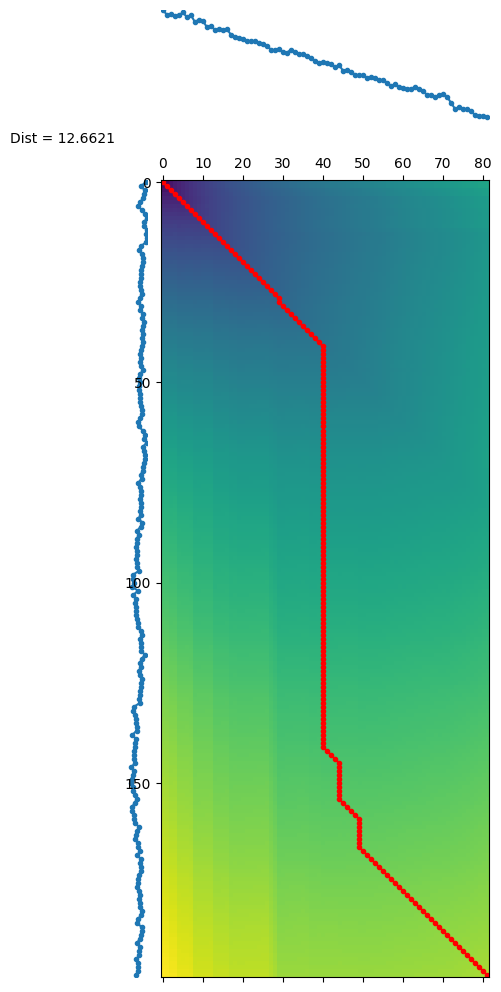

In [627]:
s2 = dtwKp2Hand[:, 0, 0]
s1 = dtwKp1Hand[:, 0, 0]
dtwvis.plot_warpingpaths(s1, s2, paths, best_path_Hand)
plt.savefig("warpingpaths.png", dpi=300, bbox_inches='tight')

In [201]:
best_path_Hand

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 (23, 23),
 (24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 36),
 (37, 37),
 (38, 38),
 (39, 39),
 (40, 40),
 (41, 41),
 (42, 42),
 (43, 43),
 (44, 44),
 (45, 45),
 (46, 46),
 (47, 47),
 (48, 48),
 (49, 49),
 (50, 50),
 (51, 51),
 (52, 52),
 (53, 53),
 (54, 54),
 (55, 55),
 (56, 56),
 (57, 57),
 (58, 58),
 (59, 59),
 (60, 60),
 (61, 61),
 (62, 62),
 (63, 63),
 (64, 64),
 (65, 65),
 (66, 66),
 (67, 66),
 (68, 66),
 (69, 66),
 (70, 66),
 (71, 66),
 (72, 66),
 (73, 66),
 (74, 66),
 (75, 66),
 (76, 66),
 (77, 66),
 (78, 66),
 (79, 66),
 (80, 66),
 (81, 66),
 (82, 66),
 (83, 66),
 (84, 66),
 (85, 66),
 (86, 66),
 (87, 66),
 (88, 66),
 (89, 66),
 (90, 66),
 (91, 66),
 (92, 66

In [131]:

def SimiLarRIGHTLegPose(img, bPath, cpt):

    if img is None:
        return None
    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        # Recolor image to RGB
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #print(results.pose_landmarks.landmark)

        # Create an empty NormalizedLandmarkList object
        landmark_list = mp.framework.formats.landmark_pb2.NormalizedLandmarkList()

        # Create 22 NormalizedLandmark objects
        for _ in range(33):
            landmark = landmark_list.landmark.add()
            landmark.Clear()
            landmark.x = 0
            landmark.y = 0
            landmark.z = 0
            landmark.visibility = 0

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].visibility

        if bPath[cpt][1] == bPath[cpt-1][1] or bPath[cpt-1][0] == bPath[cpt][0]:
        
                    # Render detections
            mp_drawing.draw_landmarks(image, landmark_list, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(0,0,255), thickness=4, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(0,0,255), thickness=4, circle_radius=2)
            )
        elif bPath[cpt][1] != bPath[cpt-1][1] and bPath[cpt-1][0] != bPath[cpt][0]:

            print (bPath[cpt])
            mp_drawing.draw_landmarks(image, landmark_list, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(230,123,255), thickness=4, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(230,123,255), thickness=4, circle_radius=2)
            )
            

        return image



In [628]:
cap1=cv2.VideoCapture(v1)
cap2=cv2.VideoCapture(v2)
size1 = (400,600)
size2 = (1200,600)
out1 = cv2.VideoWriter('similarKp1.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 25, size2) # Output video
out2 = cv2.VideoWriter('similarKp2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 25, size2) # Output video

cpt = 0

while True:

    
    success, img1 = cap1.read()
    success1, img2 = cap2.read()
    

    if success is False or img1 is None:
        print("img1 break")
        break

    if success1 is False or img2 is None:
        print("img2 break")
        break

            
    img1 = SimiLarRIGHTLegPose(img1, best_path_Hand, cpt)
    img2 = SimiLarRIGHTLegPose(img2, best_path_Hand, cpt)

    img1 = cv2.resize(img1, size2) 
    img2 = cv2.resize(img2, size2) 

    out1.write(img1)
    out2.write(img2)

    #cpt = cpt + 4
    cpt = cpt + 1
    cv2.imshow('Mediapipe Feed1', img1)
    cv2.imshow('Mediapipe Feed2', img2)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap1.release()
cap2.release()
out1.release()
out2.release()
cv2.destroyAllWindows()


(0, 0)
(0, 0)
(1, 1)
(1, 1)
(2, 2)
(2, 2)
(3, 3)
(3, 3)
(4, 4)
(4, 4)
(5, 5)
(5, 5)
(6, 6)
(6, 6)
(7, 7)
(7, 7)
(8, 8)
(8, 8)
(9, 9)
(9, 9)
(10, 10)
(10, 10)
(11, 11)
(11, 11)
(12, 12)
(12, 12)
(13, 13)
(13, 13)
(14, 14)
(14, 14)
(15, 15)
(15, 15)
(16, 16)
(16, 16)
(17, 17)
(17, 17)
(18, 18)
(18, 18)
(19, 19)
(19, 19)
(20, 20)
(20, 20)
(21, 21)
(21, 21)
(22, 22)
(22, 22)
(23, 23)
(23, 23)
(24, 24)
(24, 24)
(25, 25)
(25, 25)
(26, 26)
(26, 26)
(27, 27)
(27, 27)
(28, 28)
(28, 28)
(29, 29)
(29, 29)
(31, 30)
(31, 30)
(32, 31)
(32, 31)
(33, 32)
(33, 32)
(34, 33)
(34, 33)
(35, 34)
(35, 34)
(36, 35)
(36, 35)
(37, 36)
(37, 36)
(38, 37)
(38, 37)
(39, 38)
(39, 38)
(40, 39)
(40, 39)
(41, 40)
(41, 40)
img2 break


## FIXED IMAGE

## V3

In [420]:
cap1=cv2.VideoCapture(v1)
cap2=cv2.VideoCapture(v3)
size = (400,600)

out1 = cv2.VideoWriter('similarKp1.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, size) # Output video
out2 = cv2.VideoWriter('similarKp2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, size) # Output video

cpt = 0

total_score = 0
distances = []
scores = []
while True:

    
    success, img1 = cap1.read()
    success1, img2 = cap2.read()
    

    if success is False or img1 is None:
        break

    if success1 is False or img2 is None:
        break

    landmarks1 = trackJoints(img1)
    handLandmarks1 = trackRIGHTHandJoints(landmarks1)
    landmarks2 = trackJoints(img2)
    handLandmarks2 = trackRIGHTHandJoints(landmarks2)
    
    allKp1Hand = []
    allKp2Hand = []

    for i in range(0, len(handLandmarks1)):
        allKp1Hand.append(np.array(handLandmarks1[i]))
    for i in range(0, len(handLandmarks2)):
        allKp2Hand.append(np.array(handLandmarks2[i]))

    dtwKp1Hand = []
    dtwKp2Hand = []

    for i in range(0, len(allKp1Hand)):
        dtwKp1Hand.append([allKp1Hand[i][1], allKp1Hand[i][2]])
    for i in range(0, len(allKp2Hand)):
        dtwKp2Hand.append([allKp2Hand[i][1], allKp2Hand[i][2]])
   

    dtwKp1Hand = np.array(dtwKp1Hand)
    dtwKp2Hand = np.array(dtwKp2Hand)

    dtwKp1Hand = dtwKp1Hand / np.linalg.norm(dtwKp1Hand)
    dtwKp2Hand = dtwKp2Hand / np.linalg.norm(dtwKp2Hand)
    
    d = dtw_ndim.distance(dtwKp1Hand, dtwKp2Hand) 
    s = 100 - (d * 100)
    distances.append(d)
    scores.append(s)
    

    img1 = cv2.resize(img1, size) 
    img2 = cv2.resize(img2, size) 

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2
    text_size, _ = cv2.getTextSize(str(s), font, font_scale, font_thickness)
    text_x = int((img1.shape[1] - text_size[0]) / 2)  # center the text horizontally
    text_y = 50  # set the vertical position of the text
    cv2.putText(img1, str(s), (text_x, text_y), font, font_scale, (0, 0, 255), font_thickness)

    
    cv2.imshow('Mediapipe Feed1', img1)
    cv2.imshow('Mediapipe Feed2', img2)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap1.release()
cap2.release()
out1.release()
out2.release()
cv2.destroyAllWindows()


In [89]:
len(scores)

116

In [87]:
total_score = np.mean(scores)
print(total_score)

50.0242852978308


## V1

In [25]:
def pose(img):
    
    pTime = 0    
    lmList=[]

    nframes=30 # is the number of saved frames for the function live_tracker
    iterator=0
    angles=[]
    refTime=time.time()
    tracker=live_tracker(nframes)

     #positioning of text and dimensions
    h_angle=50
    w_angle=100
    h_j=65
    w_j=w_angle
    fontScale=2
    thickness=2

    width,height, c=img.shape
    size=(width, height)
    #writer= cv2.VideoWriter('runpose.mp4', cv2.VideoWriter_fourcc('M','J','P','G'), 20, (width,height))
    img = detector.findPose(img)
    lmList = detector.findPosition(img)
    #print(img)
    points=[12, 14, 16]
    p=points
    maxim=max(points)
    angle=0
    lmList1=[]
    inf=60
    sup=140
    #draw angle and perform evaluation
    """if(maxim>len(lmList)):
        draw=False
    if(search(lmList, p[0])  and search(lmList, p[1] ) ) and ( search(lmList, p[2]) ):
        draw=True"""
    angle=detector.findAngle(img, p[0], p[1], p[2]), 
    angles.append(angle)
    if(True):
        judge(img, angle, inf, sup)
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
    lmList1.append(lmList)
    img = cv2.resize(img, (400, 500))
    
    #ori1.write(img)
    #ori2.write(img)
    cv2.imshow("Capture1",img)
    #writer.write(img)
    return cTime,lmList1


In [26]:
#v1='videos/push2.avi'
#v2='videos/push1.avi'
#v1='videos/pick1.avi'
#v2='videos/pick2.avi'
v1 = "videos/VID_20221222_184119.mp4"
v2 = "videos/VID_20221222_184132.mp4"

In [27]:
detector = Bt.poseDetector()
cap1=cv2.VideoCapture(v1)

allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

kp1_list = []

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40


#ori1 = cv2.VideoWriter('original1.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 15, size)

while True:
    success, img1 = cap1.read()
    
    if success is False or img1 is None:
        break

    cTime1, Kp1=pose(img1)
    #print(Kp1[0])
    Kp1= np.array(Kp1)
    Kp1 = Kp1.flatten()
    kp1_list.append(Kp1)
    
    if (cTime1-refTime)>duration:
        break

    key=cv2.waitKey(10)
    if key == ord('q'):
        break

    if (cTime1-refTime)>duration:
        print("end ")
        break

cv2.destroyAllWindows()
#ori1.release()
cap1.release()
 


In [28]:
detector = Bt.poseDetector()

cap2=cv2.VideoCapture(v2)

size = (400, 500)
allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

kp2_list = []

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40


#ori2 = cv2.VideoWriter('original2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 15, size)

while True:
    
    success1, img2 = cap2.read() 

    if success1 is False or img2 is None:
        break

    cTime2, Kp2=pose(img2)
    Kp2= np.array(Kp2)
    Kp2 = Kp2.flatten()
    kp2_list.append(Kp2)
    
    
    if (cTime2-refTime)>duration:
        break

    key=cv2.waitKey(10)
    if key == ord('q'):
        break

    if (cTime2-refTime)>duration:
        print("end ")
        break

cv2.destroyAllWindows()
#ori2.release()
cap2.release() 


#### Check empty elements in Kp1 - Kp2

In [6]:
empty_array_indices_kp1 = []
empty_array_indices_kp2 = []
for i, arr in enumerate(kp1_list):
    if arr.size == 0:
        empty_array_indices_kp1.append(i)

for i, arr in enumerate(kp2_list):
    if arr.size == 0:
        empty_array_indices_kp2.append(i)

print("kp1", empty_array_indices_kp1)
print("kp2", empty_array_indices_kp2)

kp1 []
kp2 []


#### DTW

In [7]:
dtwKp1 = []
dtwKp2 = []

for i in range(0, len(kp1_list)):
    for j in range(0, len(kp1_list[i]), 3):
        dtwKp1.append(kp1_list[i][j+1])
        dtwKp1.append(kp1_list[i][j+2])

for i in range(0, len(kp2_list)):
    for j in range(0, len(kp2_list[i]), 3):
        dtwKp2.append(kp2_list[i][j+1])
        dtwKp2.append(kp2_list[i][j+2])

dtwKp1 = np.array(dtwKp1)
dtwKp2 = np.array(dtwKp2)  

dtwKp1 = dtwKp1.reshape(-1, 2)
dtwKp2 = dtwKp2.reshape(-1, 2)


In [8]:
window = int(max(len(dtwKp1), len(dtwKp2)) / 10)
max_step = int(min(len(dtwKp1), len(dtwKp2)) / 4)
#penalty for non-diagonal steps
penalty = 100
# slope constraint 
psi = 0.1

In [11]:
distance, paths = dtw_ndim.warping_paths(dtwKp1, dtwKp2, window=25, psi=2, penalty = 50000)

In [13]:
distance, paths = dtw_ndim.warping_paths(dtwKp1, dtwKp2)

(<Figure size 1000x1000 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

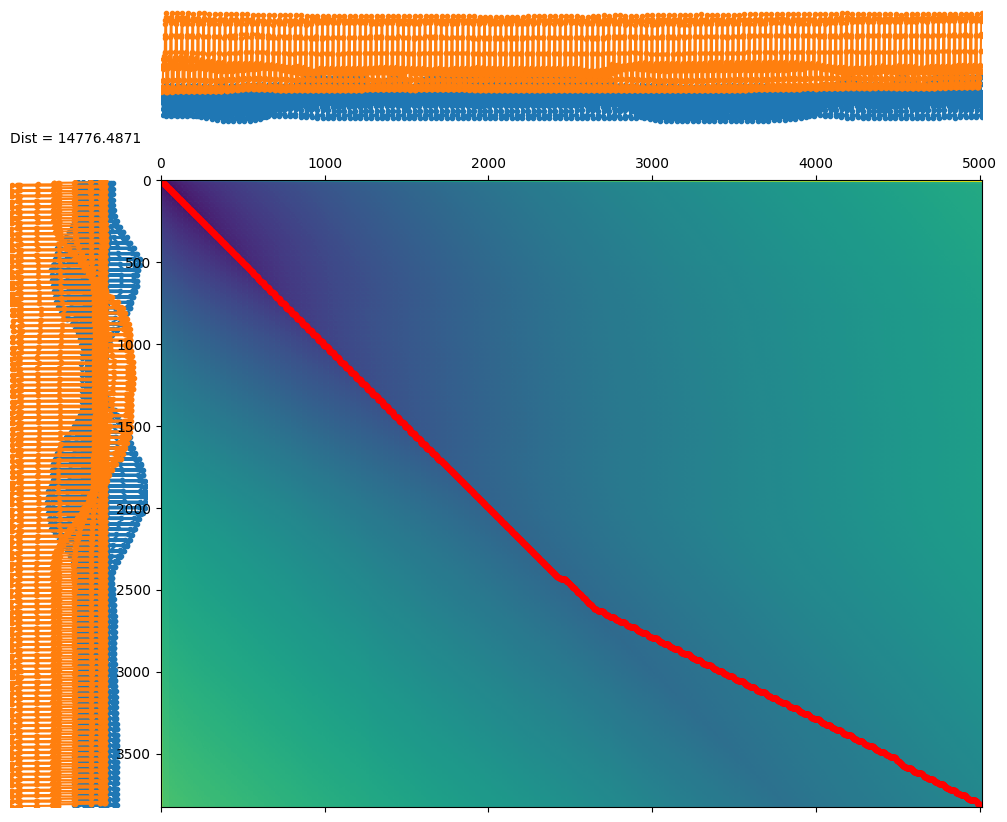

In [14]:
best_path = dtw.best_path(paths)  #take the path with the minimum distance
dtwvis.plot_warpingpaths(dtwKp1, dtwKp2, paths, best_path)

### Show all keypoints in both videos at the same time

In [64]:
width = 600
height = 600
threshold = 0.5

cap1=cv2.VideoCapture(v1)
cap2=cv2.VideoCapture(v2)

cpt = 0

size = (400, 500)
out1 = cv2.VideoWriter('allKp1.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, size) # Output video
out2 = cv2.VideoWriter('allKp2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, size) # Output video

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success1 is False or img2 is None:
        break

    for i in range(0, Kp1.shape[0], 3):
        if len(kp1_list[cpt]) != 0:
            x, y = kp1_list[cpt][i+1], kp1_list[cpt][i+2]
            cv2.circle(img1, (x, y), 4, (0, 0, 255), thickness=3)
            
    
    for i in range(0, Kp2.shape[0], 3):
        if len(kp2_list[cpt]) != 0:
            x, y = kp2_list[cpt][i+1], kp2_list[cpt][i+2]
            cv2.circle(img2, (x, y), 4, (0, 0, 255), thickness=3)
            

    img1 = cv2.resize(img1, size) 
    img2 = cv2.resize(img2, size) 

    out1.write(img1)
    out2.write(img2)

    cpt = cpt+1

    cv2.imshow("Video 1", img1)
    cv2.imshow("Video 2", img2)

    key = cv2.waitKey(50)
    if key == ord('q'):
        break

cv2.destroyAllWindows()
out1.release()
out2.release()
cap1.release()
cap2.release()


In [16]:
print(len(best_path))
print(best_path[0:100])


5613
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 3), (6, 4), (7, 5), (8, 6), (9, 7), (10, 8), (11, 9), (12, 10), (13, 11), (14, 12), (14, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 36), (38, 36), (39, 37), (40, 38), (41, 39), (42, 40), (43, 41), (44, 42), (45, 43), (46, 44), (47, 45), (47, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 69), (71, 69), (72, 70), (73, 71), (74, 72), (75, 73), (76, 74), (77, 75), (78, 76), (79, 77), (80, 78), (80, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (93, 93)]


### Show Similar keypoints in both videos at the same time

In [17]:
print(dtwKp1.shape)
print(dtwKp2.shape)
print(dtwKp1[0:10])

(3828, 2)
(5016, 2)
[[329 255]
 [342 234]
 [352 234]
 [361 233]
 [317 235]
 [308 235]
 [298 236]
 [377 247]
 [289 249]
 [349 279]]


In [18]:
kp1_list[0]

array([   0,  329,  255,    1,  342,  234,    2,  352,  234,    3,  361,
        233,    4,  317,  235,    5,  308,  235,    6,  298,  236,    7,
        377,  247,    8,  289,  249,    9,  349,  279,   10,  314,  280,
         11,  450,  375,   12,  231,  378,   13,  498,  526,   14,  201,
        535,   15,  507,  679,   16,  173,  686,   17,  519,  726,   18,
        157,  731,   19,  500,  731,   20,  166,  739,   21,  486,  715,
         22,  187,  726,   23,  399,  679,   24,  281,  680,   25,  399,
        888,   26,  270,  894,   27,  402, 1057,   28,  272, 1067,   29,
        389, 1078,   30,  287, 1090,   31,  432, 1138,   32,  224, 1150])

In [19]:
similarKp1 = []
similarKp2 = []

for i in range(0, len(best_path)):
    similarKp1.append(best_path[i][0])
    similarKp1.append(dtwKp1[best_path[i][0]])
    similarKp2.append(best_path[i][1])
    similarKp2.append(dtwKp2[best_path[i][1]])



In [20]:
print(len(similarKp2))
similarKp2[0:10]

11226


[0,
 array([315, 362]),
 1,
 array([298, 341]),
 2,
 array([297, 340]),
 3,
 array([297, 339]),
 3,
 array([297, 339])]

In [21]:
width = 600
height = 600
threshold = 0.5

cap1=cv2.VideoCapture(v1)
cap2=cv2.VideoCapture(v2)

cpt1 = 0


nbrFrames1 = dtwKp1.shape[0] 
nbrFrames2 = dtwKp2.shape[0] 

size = (400, 500)
out1 = cv2.VideoWriter('allSimilar1.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, size) # Output video
out2 = cv2.VideoWriter('allSimilar2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, size) # Output video

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success1 is False or img2 is None:
        break

    for i in range(0, len(similarKp1), 2):
            if (similarKp1[i] > cpt1 and similarKp1[i] < cpt1 + 32):
                x, y = similarKp1[i+1][0], similarKp1[i+1][1]
                cv2.circle(img1, (x, y), 4, (0, 0, 255), thickness=3)
        
    for i in range(0, len(similarKp2), 2):
            if (similarKp2[i] > cpt1 and similarKp2[i] < cpt1 + 32):
                x, y = similarKp2[i+1][0], similarKp2[i+1][1]
                cv2.circle(img2, (x, y), 4, (0, 0, 255), thickness=3)

    img1 = cv2.resize(img1, size) 
    img2 = cv2.resize(img2, size) 

    out1.write(img1)
    out2.write(img2)

    cpt1 = cpt1 + 33

    cv2.imshow("Video 1", img1)
    cv2.imshow("Video 2", img2)

    key = cv2.waitKey(20)
    if key == ord('q'):
        break

cv2.destroyAllWindows()
out1.release()
out2.release()
cap1.release()
cap2.release()


In [362]:
allSimilar = []

for i in range(0, len(best_path)):
    allSimilar.append(best_path[i])
    allSimilar.append([dtwKp1[best_path[i][0]], dtwKp2[best_path[i][1]]])
    



In [376]:
32*8

256

In [363]:
allSimilar

[(0, 0),
 [array([329, 255]), array([315, 362])],
 (1, 1),
 [array([342, 234]), array([298, 341])],
 (2, 2),
 [array([352, 234]), array([297, 340])],
 (3, 3),
 [array([361, 233]), array([297, 339])],
 (4, 3),
 [array([317, 235]), array([297, 339])],
 (5, 3),
 [array([308, 235]), array([297, 339])],
 (6, 4),
 [array([298, 236]), array([294, 343])],
 (7, 5),
 [array([377, 247]), array([288, 343])],
 (8, 6),
 [array([289, 249]), array([282, 343])],
 (9, 7),
 [array([349, 279]), array([266, 343])],
 (10, 8),
 [array([314, 280]), array([246, 350])],
 (11, 9),
 [array([450, 375]), array([302, 380])],
 (12, 10),
 [array([231, 378]), array([293, 382])],
 (13, 11),
 [array([498, 526]), array([273, 449])],
 (14, 12),
 [array([201, 535]), array([168, 459])],
 (14, 13),
 [array([201, 535]), array([266, 561])],
 (14, 14),
 [array([201, 535]), array([104, 599])],
 (15, 15),
 [array([507, 679]), array([328, 600])],
 (16, 16),
 [array([173, 686]), array([227, 661])],
 (17, 17),
 [array([519, 726]), ar

In [379]:
width = 600
height = 600
threshold = 0.5

cap1=cv2.VideoCapture(v1)
cap2=cv2.VideoCapture(v2)

cpt1 = 0


nbrFrames1 = 1
nbrFrames2 = 0

size = (400, 500)
out1 = cv2.VideoWriter('allSimilar1.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, size) # Output video
out2 = cv2.VideoWriter('allSimilar2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, size) # Output video
cond = True
while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success1 is False or img2 is None:
        break

    for i in range(0, len(allSimilar), 2):
        if (allSimilar[i][0] > cpt1 and allSimilar[i][0] < cpt1 + 32):
            x1, y1 = allSimilar[i+1][0]
                
            cv2.circle(img1, (x1, y1), 4, (0, 0, 255), thickness=3)
            

    for i in range(0, len(allSimilar), 2):
        if (allSimilar[i][1] > cpt1 and allSimilar[i][1] < cpt1 + 32 and allSimilar[i][0] >= 224 and allSimilar[i][0] <= 1000):
           
            x2, y2 = allSimilar[i+1][1]    
            
            cv2.circle(img2, (x2, y2), 4, (0, 0, 255), thickness=3)     

    img1 = cv2.resize(img1, size) 
    img2 = cv2.resize(img2, size) 

    out1.write(img1)
    out2.write(img2)

    cpt1 = cpt1 + 33
    
   
    cv2.imshow("Video 2", img2)
    if cond:
        cv2.imshow("Video 1", img1)
    cond = True
    key = cv2.waitKey(20)
    if key == ord('q'):
        break

cv2.destroyAllWindows()
out1.release()
out2.release()
cap1.release()
cap2.release()


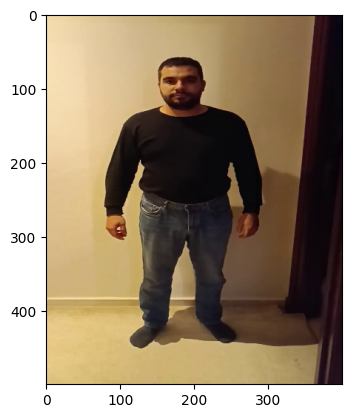

In [329]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("first_frame1.png")
plt.imshow(img, cmap='gray')
plt.show()

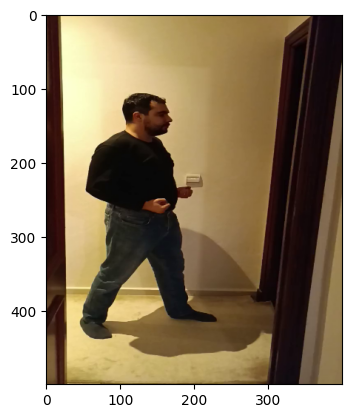

In [330]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("first_frame2.png")
plt.imshow(img, cmap='gray')
plt.show()